In [1]:
from skimage.io import imread
from napari_workflow_optimizer import JaccardLabelImageOptimizer, Workflow
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import pyclesperanto_prototype as cle

/Users/haase/code/pyclesperanto_prototype/pyclesperanto_prototype/_tier0/_pycl.py:30: UserWarning: Data type double is not supported by your GPU. Will use float instead.
  warnings.warn("Data type double is not supported by your GPU. Will use float instead.")


In [2]:
w = Workflow()
w.set("labeled", nsbatwm.thresholded_local_minima_seeded_watershed, "input", spot_sigma=2, outline_sigma=2)

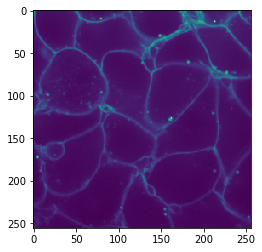

In [3]:
w.set("input", imread("membranes_2d.tif")) # image data source: scikit-image cells3d example, slice 28
input_image = w.get("input")
cle.imshow(input_image)

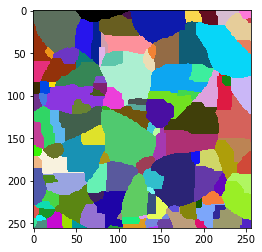

In [4]:
result = w.get("labeled")
cle.imshow(result, labels=True)

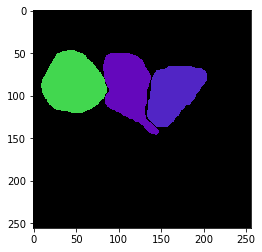

In [5]:
ground_truth = imread("membranes_2d_sparse_labels.tif")
cle.imshow(ground_truth, labels=True)

In [6]:
jlio = JaccardLabelImageOptimizer(w)
jlio.get_numeric_parameters()

[2, 2, 500]

 final_simplex: (array([[   9.4       ,    2.83333333, -250.        ],
       [   9.88206447,    2.95291495, -293.77572016],
       [   9.40246914,    2.95401235, -258.56481481],
       [   9.61536351,    2.92033608, -276.20884774]]), array([-0.10388815, -0.10376672, -0.10376672, -0.10375615]))
           fun: -0.10388815377572722
       message: 'Maximum number of iterations has been exceeded.'
          nfev: 44
           nit: 20
        status: 2
       success: False
             x: array([   9.4       ,    2.83333333, -250.        ])


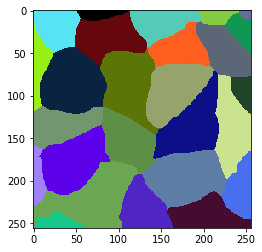

In [7]:
best_param = jlio.optimize("labeled", ground_truth, maxiter=20)
jlio.set_numeric_parameters(best_param)
cle.imshow(w.get("labeled"), labels=True)

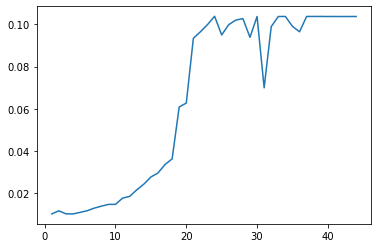

In [8]:
import matplotlib.pyplot as plt
attempt, quality = jlio.get_plot()

plt.plot(attempt, quality)